## Machine Learning M2 (NMIMS M2 Batch - 2)
Name: Ishita Gupta

Roll Number: J018

### Importing Libraries

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

### Reading and Visualizing Data

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape, test_df.shape

((201037, 11), (86159, 10))

In [4]:
train_df.head()

,id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,137901,1994-09,HOUGANG,4 ROOM,443,HOUGANG AVE 8,07 TO 09,103.0,MODEL A,1990,193000
1,47497,1999-06,ANG MO KIO,3 ROOM,461,ANG MO KIO AVE 10,07 TO 09,68.0,NEW GENERATION,1980,150000
2,250681,1995-06,BEDOK,5 ROOM,67,BEDOK STH AVE 3,07 TO 09,123.0,STANDARD,1977,340000
3,227426,1996-03,BEDOK,3 ROOM,530,BEDOK NTH ST 3,04 TO 06,68.0,NEW GENERATION,1979,153000
4,277594,1994-10,BISHAN,3 ROOM,306,SHUNFU RD,04 TO 06,71.0,NEW GENERATION,1985,116000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201037 entries, 0 to 201036
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   201037 non-null  int64  
 1   month                201037 non-null  object 
 2   town                 201037 non-null  object 
 3   flat_type            201037 non-null  object 
 4   block                201037 non-null  object 
 5   street_name          201037 non-null  object 
 6   storey_range         201037 non-null  object 
 7   floor_area_sqm       201037 non-null  float64
 8   flat_model           201037 non-null  object 
 9   lease_commence_date  201037 non-null  int64  
 10  resale_price         201037 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 16.9+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86159 entries, 0 to 86158
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   86159 non-null  int64  
 1   month                86159 non-null  object 
 2   town                 86159 non-null  object 
 3   flat_type            86159 non-null  object 
 4   block                86159 non-null  object 
 5   street_name          86159 non-null  object 
 6   storey_range         86159 non-null  object 
 7   floor_area_sqm       86159 non-null  float64
 8   flat_model           86159 non-null  object 
 9   lease_commence_date  86159 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 6.6+ MB


In [7]:
# Copying data of train_df into train and test_df into test
train = train_df.copy(deep=True)
test = test_df.copy(deep=True)

In [8]:
cat_cols = ['month','town','flat_type','block','street_name','storey_range','flat_model']

In [9]:
# Plot of value counts for each field

for col in cat_cols:
    print("Number of unique values for ", col)
    print(train_df[col].nunique())
    print('\n')       

Number of unique values for  month
120


Number of unique values for  town
26


Number of unique values for  flat_type
7


Number of unique values for  block
1093


Number of unique values for  street_name
417


Number of unique values for  storey_range
9


Number of unique values for  flat_model
13




### Encoding categorical variables

In [10]:
le = preprocessing.LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])

train.head()

,id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,137901,56,11,3,425,152,2,103.0,5,1990,193000
1,47497,113,0,2,445,5,2,68.0,8,1980,150000
2,250681,65,1,4,719,32,2,123.0,11,1977,340000
3,227426,74,1,2,569,27,1,68.0,8,1979,153000
4,277594,57,2,2,266,305,1,71.0,8,1985,116000


Text(0.5, 1.0, 'pearson correlation')

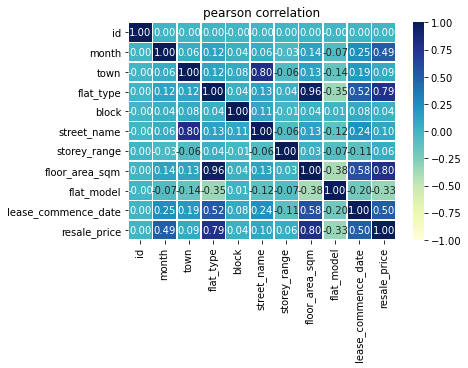

In [11]:
corr_matrix = train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

We observe that the fields 'month', 'flat_type', 'floor_area_sqm','lease_commmence_date' and 'street_name' are of considerable importance

### Splitting data into train and test data

In [ ]:
X = train.copy(deep=True)
X = X.drop(columns=['resale_price'])
y = train.resale_price
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train.hist(bins = 50, figsize = (20,15))
plt.show()

### Fitting the data to various models

#### Linear Regression

In [35]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

,id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date
0,137901,56,11,3,425,152,2,103.0,5,1990
1,47497,113,0,2,445,5,2,68.0,8,1980
2,250681,65,1,4,719,32,2,123.0,11,1977
3,227426,74,1,2,569,27,1,68.0,8,1979
4,277594,57,2,2,266,305,1,71.0,8,1985
...,...,...,...,...,...,...,...,...,...,...
201032,175500,3,18,3,65,133,2,82.0,2,1977
201033,271437,104,24,5,295,380,2,192.0,1,1994
201034,77,71,25,3,40,405,3,104.0,5,1985
201035,142299,112,8,4,754,96,1,132.0,5,1995


In [36]:
# Predicting y values
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [37]:
# Calculating MAE
train_mae = mean_absolute_error(y_train,y_hat_train)
test_mae = mean_absolute_error(y_test,y_hat_test)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train MAE: 43310.1059369778
Test MAE: 42963.88332181087


The MAE is too high for Linear Regression

#### Decision Tree Regressor

In [47]:
model_tree = DecisionTreeRegressor(max_depth=11)
model_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=11)

In [48]:
y_hat_train = model_tree.predict(X_train)
y_hat_test = model_tree.predict(X_test)

In [49]:
train_mae = mean_absolute_error(y_train,y_hat_train)
test_mae = mean_absolute_error(y_test,y_hat_test)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train MAE: 16567.172266563535
Test MAE: 17398.27314557075


#### Gradient Boosting Regressor (Ensemble Method)

In [62]:
from sklearn import ensemble
clf2 = ensemble.GradientBoostingRegressor(n_estimators=500, max_depth=7, min_samples_split=4, learning_rate=0.1)

In [63]:
clf2.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=7, min_samples_split=4, n_estimators=500)

In [64]:
y_hat_train = clf2.predict(X_train)
y_hat_test = clf2.predict(X_test)

train_mae = mean_absolute_error(y_train,y_hat_train)
test_mae = mean_absolute_error(y_test,y_hat_test)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train MAE: 10062.221601820955
Test MAE: 11468.647910274289


#### XG Boost

In [78]:
model = XGBRegressor(n_estimators=1000, max_depth=6, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)

y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

train_mae = mean_absolute_error(y_train,y_hat_train)
test_mae = mean_absolute_error(y_test,y_hat_test)
print("Train MAE:", train_mae)
print("Test MAE:", test_mae)

Train MAE: 10019.581045184734
Test MAE: 11403.631356575932


Both Gradient Boosting Regressor and XG Boost give a lesser MAE than the other techniques

### Making a model with the entire train data

In [86]:
model = XGBRegressor(n_estimators=1000, max_depth=6, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.100000001, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

### Submission

In [87]:
for col in cat_cols:
    test[col] = le.fit_transform(test[col])

test.head()

,id,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date
0,5,95,23,2,1070,223,4,68.0,2,1970
1,6,85,12,4,565,348,0,121.0,2,1986
2,15,111,1,2,758,33,2,67.0,8,1978
3,20,65,25,2,45,400,1,68.0,8,1984
4,21,34,13,2,140,45,3,65.0,2,1976


We are making final predictions on the test dataset using XG Boost since it returned the lowest MAE

In [88]:
test_sub = pd.read_csv('test.csv')
test_sub = test_sub.drop(['month','town','flat_type','block','street_name','storey_range','floor_area_sqm','flat_model','lease_commence_date'], axis=1)   
pred = model.predict(test)
test_sub['resale_price'] = pred
test_sub

,id,resale_price
0,5,185868.062500
1,6,389487.031250
2,15,138982.843750
3,20,105494.023438
4,21,34534.937500
...,...,...
86154,287174,30820.755859
86155,287182,156373.828125
86156,287185,227149.390625
86157,287188,226556.437500


In [89]:
test_sub.to_csv('submission2.csv', index=False)